In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
predicted_labels_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/predicted_sentiment_labels_zero_shot_3_class.txt", sep='\t', index_col=0)
predicted_labels_few_shot_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/predicted_sentiment_labels_few_shot_3_class.txt", sep='\t', index_col=0)
original_labels_df = pd.read_csv("./sst_dataset/SST2-Data/SST2-Data/stanfordSentimentTreebank/stanfordSentimentTreebank/sentiment_labels_test.txt", sep='\t', index_col=0)

In [20]:
#predicted_labels_df['classified_sentiment'] = pd.to_numeric(predicted_labels_df['classified_sentiment'], downcast='integer', errors='coerce')
#predicted_labels_few_shot_df['classified_sentiment'] = pd.to_numeric(predicted_labels_few_shot_df['classified_sentiment'], downcast='integer', errors='coerce')

# For three class classification:
mapping = {0: 0, 1: 0, 2: 1, 3: 2, 4: 2}
# Apply the mapping
#predicted_labels_df['classified_sentiment'] = predicted_labels_df['classified_sentiment'].replace(mapping)
#predicted_labels_few_shot_df['classified_sentiment'] = predicted_labels_few_shot_df['classified_sentiment'].replace(mapping)
original_labels_df['sentiment_labels'] = original_labels_df['sentiment_labels'].replace(mapping)

In [21]:
# Create a mask to exclute NaN values from mean calculation
mask = predicted_labels_df['classified_sentiment'].notna()
mask_few_shot = predicted_labels_few_shot_df['classified_sentiment'].notna()

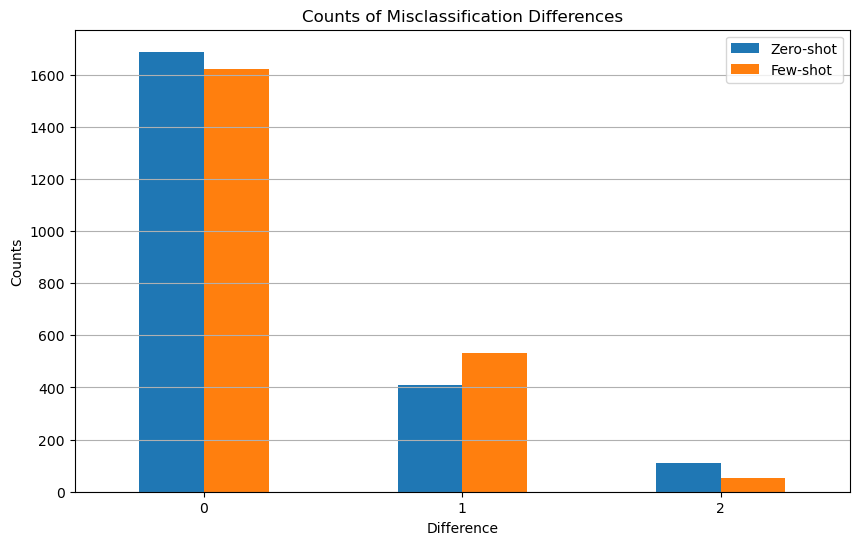

In [22]:
# Calculating differences
diff = np.abs(original_labels_df['sentiment_labels'][mask] - predicted_labels_df['classified_sentiment'][mask])
diff_counts = diff.value_counts()

diff_few_shot = np.abs(original_labels_df['sentiment_labels'][mask_few_shot] - predicted_labels_few_shot_df['classified_sentiment'][mask_few_shot])
diff_counts_few_shot = diff_few_shot.value_counts()

# Merging and sorting the counts
combined_diff_counts = pd.DataFrame({'Zero-shot': diff_counts, 'Few-shot': diff_counts_few_shot}).fillna(0)
combined_diff_counts.sort_index(inplace=True)

#matplotlib.rcParams.update({'font.size': 16})

# Function to format the tick labels as integers
def to_int(x, pos):
    return '%d' % x

# Plotting
plt.figure(figsize=(10, 6))
combined_diff_counts.plot(kind='bar', ax=plt.gca())
plt.title('Counts of Misclassification Differences')
plt.xlabel('Difference')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_int))
plt.grid(axis='y')
plt.legend()
plt.savefig('misclassification_differences_3_class.png')
plt.show()

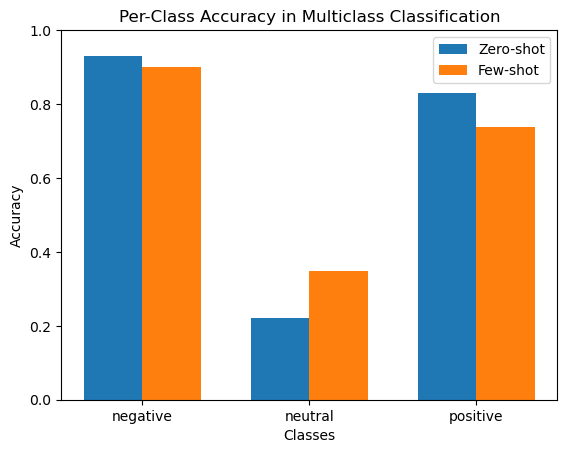

In [23]:
#labels = ['very negative', 'negative', 'neutral', 'positive', 'very positive']
labels = ['negative', 'neutral', 'positive']

# Calculating per-class accuracy for regular classification
y_pred = predicted_labels_df['classified_sentiment'][mask].values
y_true = original_labels_df['sentiment_labels'][mask].values
classes = np.unique(np.concatenate((y_pred, y_true)))
cm = confusion_matrix(y_true, y_pred, labels=classes)
class_accuracy_regular = cm.diagonal() / cm.sum(axis=1)

# Calculating per-class accuracy for few-shot classification
y_pred_few_shot = predicted_labels_few_shot_df['classified_sentiment'][mask_few_shot].values
y_true_few_shot = original_labels_df['sentiment_labels'][mask_few_shot].values
cm_few_shot = confusion_matrix(y_true_few_shot, y_pred_few_shot, labels=classes)
class_accuracy_few_shot = cm_few_shot.diagonal() / cm_few_shot.sum(axis=1)

# Width of the bars in the bar plot
bar_width = 0.35

# Plotting
fig, ax = plt.subplots()
index = np.arange(len(classes))

bar1 = ax.bar(index, class_accuracy_regular, bar_width, label='Zero-shot')
bar2 = ax.bar(index + bar_width, class_accuracy_few_shot, bar_width, label='Few-shot')

ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.set_title('Per-Class Accuracy in Multiclass Classification')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limit to range from 0 to 1
ax.legend()
plt.savefig('per_class_acc_3_class.png')
plt.show()

In [26]:
# Classification report for regular classification
report_regular = classification_report(y_true, y_pred, target_names=labels)
print("Zero-shot Classification Report:\n", report_regular)

# Classification report for few-shot classification
report_few_shot = classification_report(y_true_few_shot, y_pred_few_shot, target_names=labels)
print("Few-shot Classification Report:\n", report_few_shot)

Zero-shot Classification Report:
               precision    recall  f1-score   support

    negative       0.73      0.93      0.82       912
     neutral       0.45      0.22      0.30       389
    positive       0.88      0.83      0.85       909

    accuracy                           0.76      2210
   macro avg       0.69      0.66      0.66      2210
weighted avg       0.74      0.76      0.74      2210

Few-shot Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.90      0.83       911
     neutral       0.33      0.35      0.34       389
    positive       0.91      0.74      0.81       907

    accuracy                           0.74      2207
   macro avg       0.67      0.66      0.66      2207
weighted avg       0.75      0.74      0.74      2207



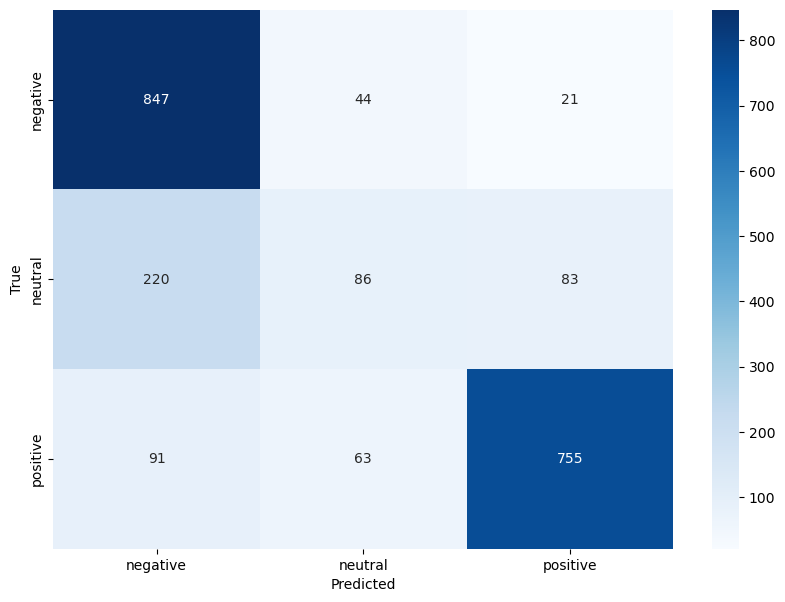

In [27]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.show()

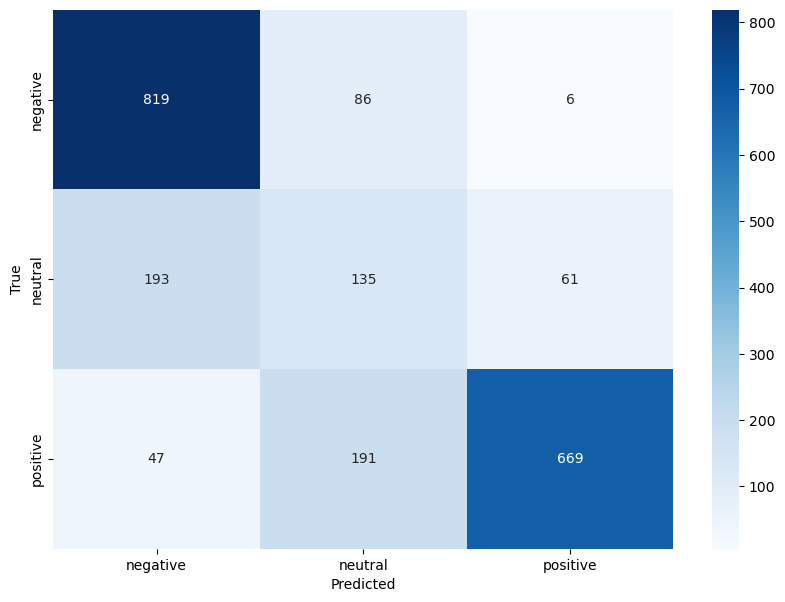

In [28]:
# Generate the confusion matrix
cm = confusion_matrix(y_true_few_shot, y_pred_few_shot)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix_few_shot.png')
plt.show()